In [1]:
import csv
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
cities_zip = pathlib.Path('../data/combined_clean_v1.csv')
cities_zip_df = pd.read_csv(cities_zip)
# replace NaN with 0's
cities_zip_df.fillna(0, inplace = True, downcast = 'infer')
cities_zip_df[['nightPrice', 'Price','capacityOfPeople', 'numOfRooms', 'reviewsCount', 'startRating', 'occupancy', 'nightsBooked']].astype(int,copy=False)
cities_zip_df[['id','propertyId']].astype(str,copy=False)

,id,propertyId
0,28612684,11695191
1,28612665,15915760
2,28612651,1650397
3,28612691,16824550
4,28612677,17097814
...,...,...
3306,5965389,0
3307,5965391,0
3308,5968654,0
3309,5969828,0


In [4]:
# Factor multiplier converts nightly rates into monthly rates. Multiplier is derived from the average yearly occupancy. Assume this rate for a month: (30 days * 60% = 18 days)
multiplier = 18
cities_zip_df['clean_mthly_price'] = cities_zip_df['nightPrice']*multiplier + cities_zip_df['Price']
cities_zip_df[['id','source','neighborhood', 'propertyType', 'clean_mthly_price']]
cities_zip_df

,id,source,neighborhood,propertyType,clean_mthly_price
0,28612684,Airbnb,Westchester/Playa Del Rey,Apartment,2232
1,28612665,Airbnb,Westchester/Playa Del Rey,House,4824
2,28612651,Airbnb,Westchester/Playa Del Rey,Guest suite,2070
3,28612691,Airbnb,Westchester/Playa Del Rey,Apartment,1674
4,28612677,Airbnb,Westchester/Playa Del Rey,House,1620
...,...,...,...,...,...
3306,5965389,Regular,Hermon,apartment,1800
3307,5965391,Regular,Hermon,apartment,2495
3308,5968654,Regular,Hermon,apartment,2950
3309,5969828,Regular,Hermon,apartment,2395


In [9]:
property_dict = {'propertyType': ['Apartment',
                 'House',
                 'Guest suite',
                 'Guest House',
                 'Townhouse',
                 'Condominium', 
                 'Tiny house', 
                 'Bungalow',
                 'Cottage',
                  'Villa',
                  'Other',
                  'Serviced apartment', 
                  'Loft',
                   'Cabin',
                   'single_home',
                   'apartment',
                   'townhouse',
                    'Multi Family'], 
                 'new_propertyType': ['Apartment',
                    'House',
                    'House',
                     'House',
                    'Townhouse',
                    'Condominium',
                    'House',
                    'House',
                    'House',
                    'House',
                    'Other',
                    'Apartment',
                    'Apartment',
                    'House',
                     'House',
                    'Apartment',
                    'Townhouse',
                    'Apartment'
                   
]}
property_df = pd.DataFrame(property_dict)
cities_merged_df = cities_zip_df.merge(property_df,how='inner',on='propertyType')

,id,propertyId,neighborhood_id,nightPrice,numOfBaths,numOfBeds,Price,zip,lat,lon,capacityOfPeople,numOfRooms,reviewsCount,startRating,occupancy,nightsBooked,clean_mthly_price
new_propertyType,,,,,,,,,,,,,,,,,
Apartment,17644954477,7491385749,283229664,52642,3162.0,2628,2255946,137032481,51999.908375,-180610.307894,1644,526,38688,2026,26887,89043,3203502
Condominium,1888575927,1329095757,10507107,10235,103.5,154,0,5884223,2249.690193,-7814.526390,305,117,2515,326,3941,12629,184230
House,23848648498,15511904259,200615734,208348,2279.5,3521,1657606,110106240,41879.809128,-145363.197784,4083,1638,59125,3586,49267,169133,5407870
Other,725180731,31108148,25636387,181,256.0,276,699374,11458288,4327.318207,-15031.127159,6,1,133,10,127,464,702632
Townhouse,1370858328,667029130,17866474,5281,248.0,267,229471,9785003,3717.937256,-12905.027962,159,68,2038,170,2404,8446,324529


In [10]:
# Remove "Other" from propertyType (not a type of property we want to invest in)
cities_clean_df = cities_merged_df[cities_merged_df['new_propertyType'] != 'Other']

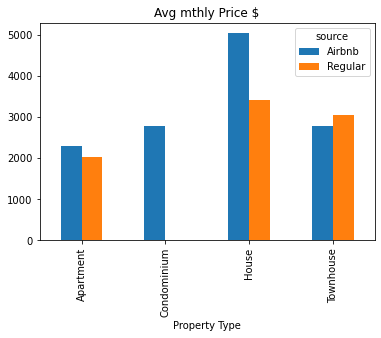

In [11]:
# group by propertyType and source
cities_grouped_df = (cities_clean_df.groupby(['new_propertyType','source']).mean())[['numOfBaths', 'numOfBeds','occupancy','clean_mthly_price']]
cities_unstacked_df = cities_grouped_df.unstack(level=-1)
cities_unstacked_df['clean_mthly_price'].plot.bar(title = 'Avg mthly Price $')
plt.xlabel('Property Type')
plt.show()

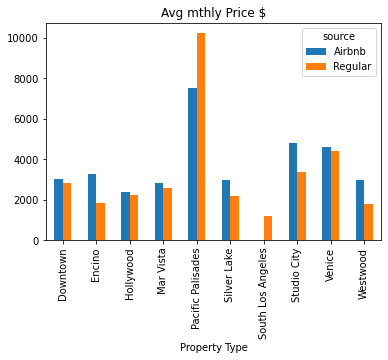

In [16]:
neighbor_df = cities_clean_df.loc[
                      (cities_clean_df['neighborhood'] == 'Silver Lake') |
                      (cities_clean_df['neighborhood'] == 'Pacific Palisades') |
                      (cities_clean_df['neighborhood'] == 'Encino') |
                      (cities_clean_df['neighborhood'] == 'Downtown') |
                      (cities_clean_df['neighborhood'] == 'Venice') |
                      (cities_clean_df['neighborhood'] == 'Hollywood') |
                      (cities_clean_df['neighborhood'] == 'Westwood') |
                      (cities_clean_df['neighborhood'] == 'Mar Vista') |
                      (cities_clean_df['neighborhood'] == 'South Los Angeles') |
                      (cities_clean_df['neighborhood'] == 'Studio City')]

neighbor_df2 = (neighbor_df.groupby(['neighborhood','source']).mean())[['numOfBaths', 'numOfBeds','occupancy','clean_mthly_price']]
neighbor_df2 = neighbor_df2.unstack(level=-1)
neighbor_df2['clean_mthly_price'].plot.bar(title = 'Avg mthly Price $')
plt.xlabel('Property Type')
plt.show()

In [13]:
#format the table of results
cities_grouped_df['clean_mthly_price'] = cities_grouped_df['clean_mthly_price'].map('${:,.2f}'.format)
cities_grouped_df['occupancy'] = cities_grouped_df['occupancy'].map('{:.1f}'.format)
cities_grouped_df['numOfBaths'] = cities_grouped_df['numOfBaths'].map('{:.1f}'.format)
cities_grouped_df['numOfBeds'] = cities_grouped_df['numOfBeds'].map('{:.1f}'.format)
cities_grouped_df

numOfBaths numOfBeds occupancy clean_mthly_price
new_propertyType source                                                  
Apartment        Airbnb         1.3       1.9      65.1         $2,294.32
                 Regular        2.4       1.6       0.0         $2,026.91
Condominium      Airbnb         1.6       2.3      59.7         $2,791.36
House            Airbnb         1.8       3.0      66.2         $5,040.68
                 Regular        2.0       2.7       0.0         $3,424.81
Townhouse        Airbnb         1.7       2.3      70.7         $2,795.82
                 Regular        2.5       2.5       0.0         $3,059.61